In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install numpy
# !pip install pandas
# !pip install csv
# !pip install matplotlib
# !pip install seaborn
# !pip install tqdm

Imports

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm
import multiprocessing

Constants

In [4]:
filename = "Real Students Grades.csv"
NUM_STUD = 5000

Read Data

In [5]:
with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if needed
    next(csv_reader, None)
    # Iterate over each row in the CSV file
    sat = []
    bagrut = []
    for row in csv_reader:
        if row[0] and row[1] and float(row[1]) > 0:
            sat.append(float(row[0]))
            bagrut.append(float(row[1]))
sat = np.array(sat)
bagrut = np.array(bagrut)

In [6]:
sat_normalized = (sat - np.min(sat)) / (np.max(sat) - np.min(sat))
bagrut_normalized = (bagrut - np.min(bagrut)) / (np.max(bagrut) - np.min(bagrut))

Visualize the initial data distribution

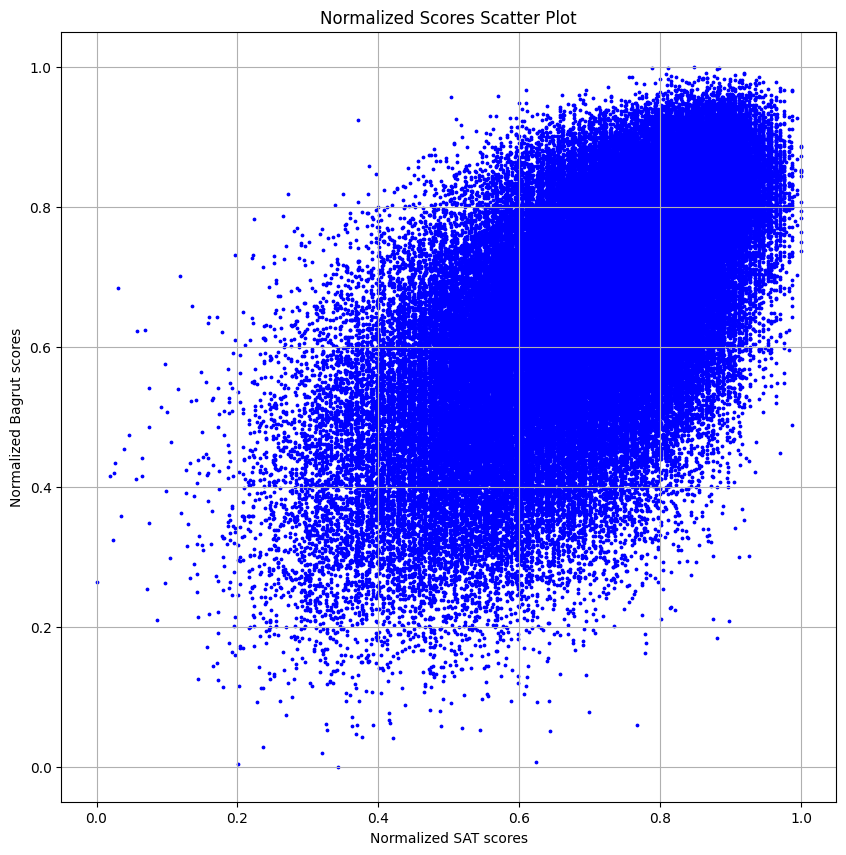

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(sat_normalized, bagrut_normalized, color='blue', s=3)
plt.xlabel('Normalized SAT scores')
plt.ylabel('Normalized Bagrut scores')
plt.title('Normalized Scores Scatter Plot')
plt.grid(True)
plt.show()

In [8]:
print(np.shape(sat)) # number os students

(136939,)


Choosing subset of the samples for analyzing for complexity reduction

In [9]:
indices = np.random.choice(len(sat_normalized), NUM_STUD, replace=False) #randomly choose 15K students
students = np.stack((sat_normalized[indices], bagrut_normalized[indices]), axis=1)
print(np.shape(students))
students = pd.DataFrame(students)
students

(5000, 2)


,0,1
0,0.690141,0.562302
1,0.387324,0.346386
2,0.649648,0.508085
3,0.632042,0.400285
4,0.799296,0.626030
...,...,...
4995,0.593310,0.819277
4996,0.586268,0.594166
4997,0.779930,0.834020
4998,0.484155,0.435637


Random Sort algorithm function

In [10]:
def random_sort(df, interactions, num_colors=10):
    nparr = np.array(df)
    n = len(nparr)
    for _ in tqdm(range(interactions)):
        i = np.random.randint(0, n-1)
        if not((nparr[i,0] < nparr[i+1,0]) and (nparr[i,1] < nparr[i+1,1])):
            nparr[i+1], nparr[i] = nparr[i].copy(), nparr[i+1].copy()
    df_sorted = pd.DataFrame(nparr, columns = ['SAT','Bagrut','color'])
    df_sorted['color'] = np.array([[i]*int(n/num_colors) for i in range(num_colors)]).flatten()           
    return df_sorted  

Analyzing algorithm performance basaed on number of cycles

100%|██████████| 5000/5000 [00:00<00:00, 161703.74it/s]


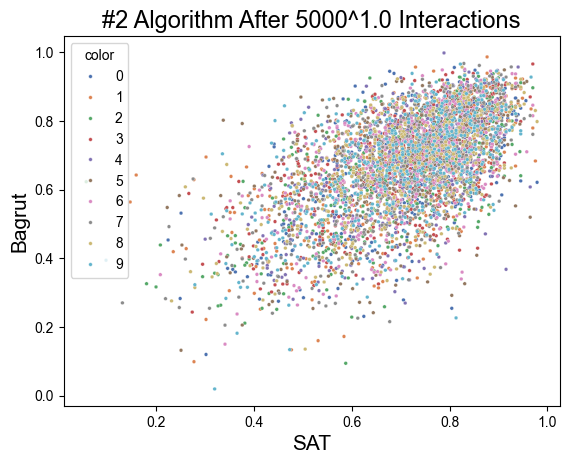

100%|██████████| 41450/41450 [00:00<00:00, 188889.92it/s]


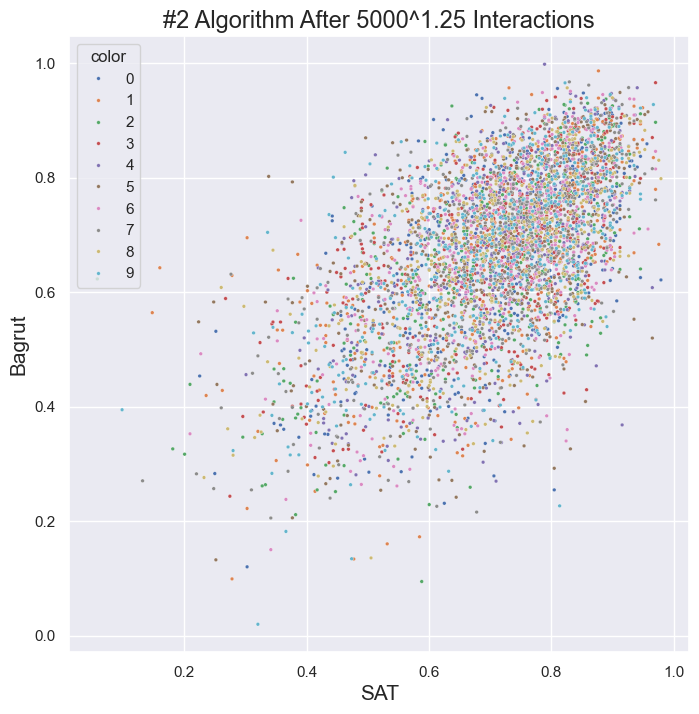

100%|██████████| 348553/348553 [00:01<00:00, 193118.46it/s]


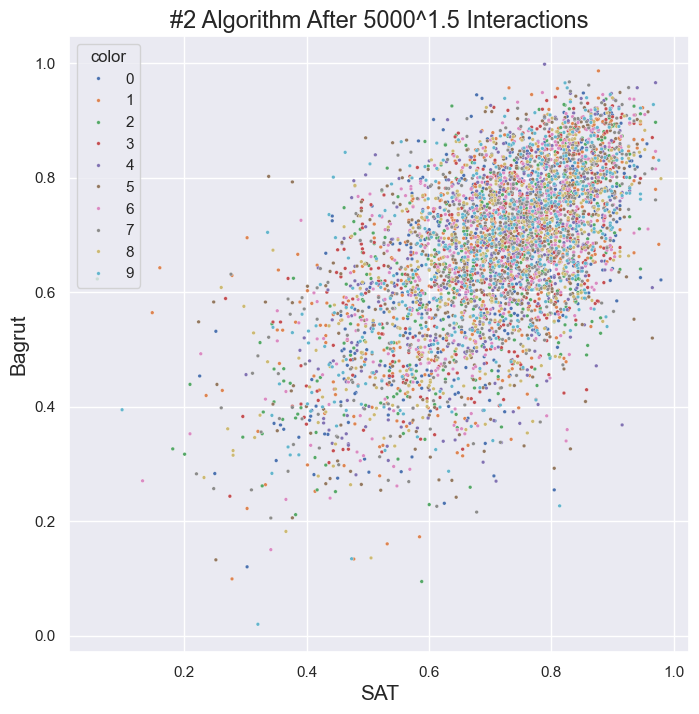

100%|██████████| 2930972/2930972 [00:16<00:00, 177561.45it/s]


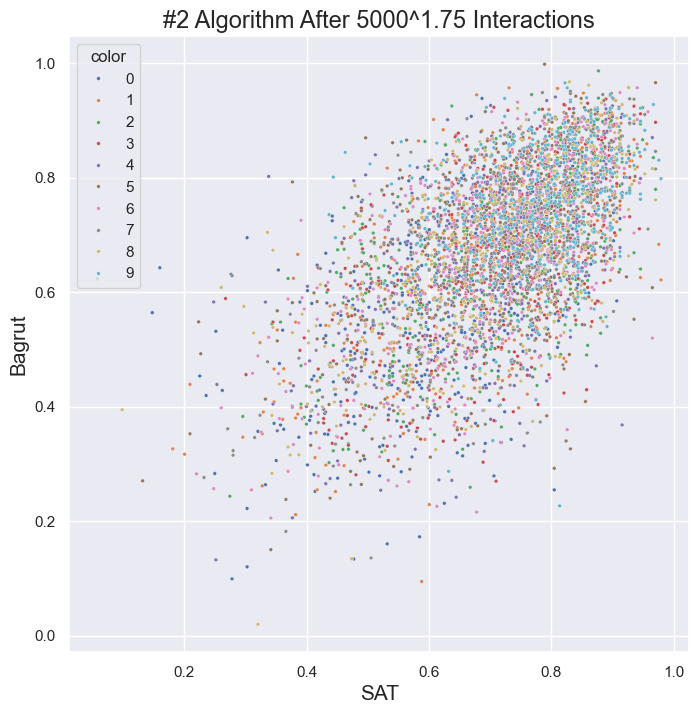

100%|██████████| 24646446/24646446 [02:19<00:00, 177051.72it/s]


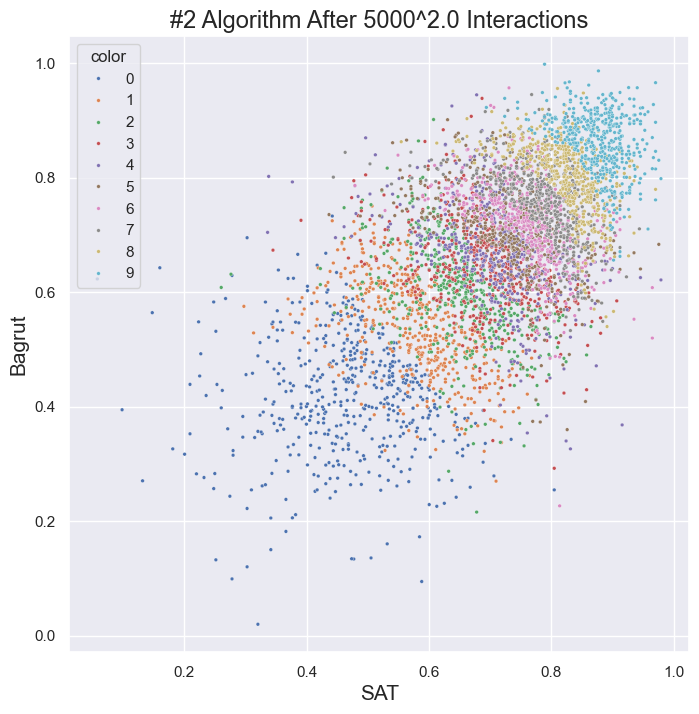

100%|██████████| 207251086/207251086 [21:05<00:00, 163807.36it/s]


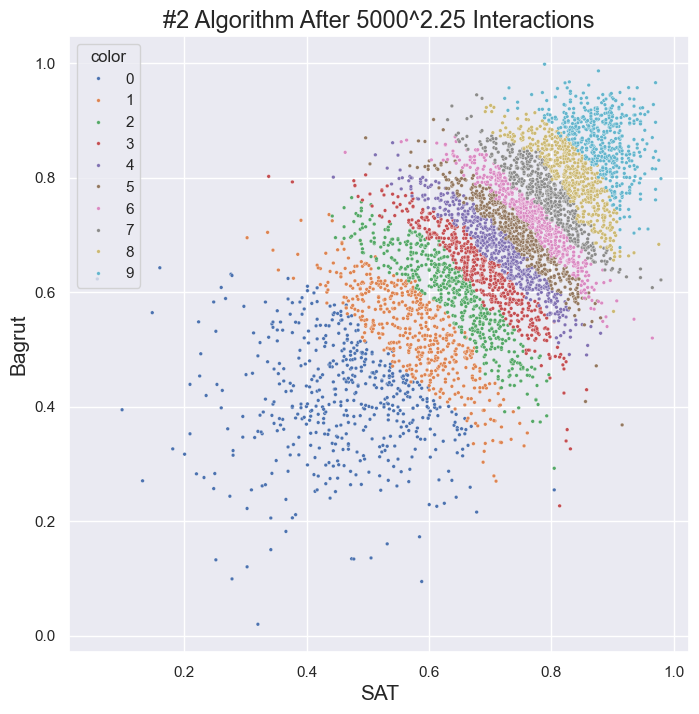

100%|██████████| 1742766952/1742766952 [3:00:32<00:00, 160890.35it/s]  


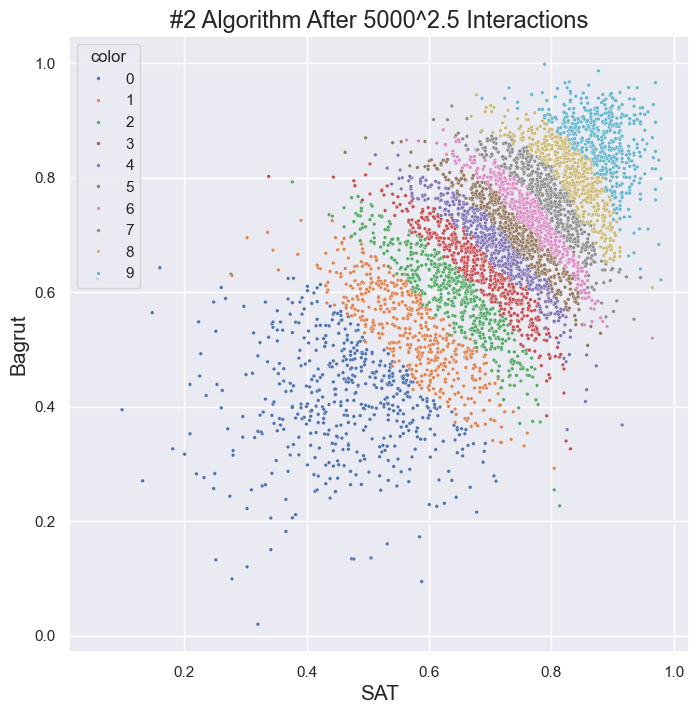

  8%|▊         | 1104220858/14654864833 [1:55:55<24:47:38, 151813.97it/s]

In [ ]:
cycles = [i/100.0 for i in range(100, 360, 25)]

for cycle in cycles:
    students_df_sort = students.copy()
    students_df_sort['color'] = [0] * students_df_sort.shape[0]
    if cycle == 1:
        interactions = int(pow(NUM_STUD, cycle))
    else:
        interactions = int(pow(NUM_STUD, cycle) - pow(NUM_STUD, cycle - 0.5))
    students_df_sort = random_sort(students_df_sort, interactions)

    sns.scatterplot(data=students_df_sort, x="SAT", y="Bagrut", hue="color", palette='deep', markers=True, s=7)
    sns.set(rc={'figure.figsize': (8, 8)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(NUM_STUD, cycle), size=17)
    plt.ylabel('Bagrut', size=15)
    plt.xlabel('SAT', size=15)
    plt.savefig('Scatter_{}_Real_Students_in_{}_Interactions.png'.format(NUM_STUD, cycle))
    plt.show()

In [ ]:
# num_cpu_cores = multiprocessing.cpu_count()
# num_cpu_cores

In [ ]:
# def process_cycle(cycle):
#     print(f'start cycle{cycle}')
#     students_df_sort = students.copy()
#     students_df_sort['color'] = [0] * students_df_sort.shape[0]
#     if cycle == 1:
#         interactions = int(pow(NUM_STUD, cycle))
#     else:
#         interactions = int(pow(NUM_STUD, cycle) - pow(NUM_STUD, cycle - 0.5))
#     students_df_sort = random_sort(students_df_sort, interactions)

#     sns.scatterplot(data=students_df_sort, x="SAT", y="Bagrut", hue="color", palette='deep', markers=True, s=7)
#     sns.set(rc={'figure.figsize': (8, 8)})
#     plt.title('#2 Algorithm After {}^{} Interactions'.format(NUM_STUD, cycle), size=17)
#     plt.ylabel('Bagrut', size=15)
#     plt.xlabel('SAT', size=15)
#     plt.savefig('ScatterRealStudentsin{}.png'.format(cycle))
#     plt.show()
#     print('Finished ScatterRealStudentsin{}.png'.format(cycle))

In [ ]:
# cycles = [i/100.0 for i in range(100, 360, 25)]
# with multiprocessing.Pool(processes=2) as pool:
#     pool.map(process_cycle, cycles)

In [ ]:
cycles = [i/100.0 for i in range(100, 360, 25)]
num_of_points = [i for i in range(7500,10001,2500)]

for num in num_of_points:
    indices = np.random.choice(len(sat_normalized), num, replace=False) #randomly choose 15K students
    students = np.stack((sat_normalized[indices], bagrut_normalized[indices]), axis=1)
    print(np.shape(students))
    students = pd.DataFrame(students)
    
    for cycle in cycles:
        students_df_sort = students.copy()
        students_df_sort['color'] = [0] * students_df_sort.shape[0]
        if cycle == 1:
            interactions = int(pow(num, cycle))
        else:
            interactions = int(pow(num, cycle) - pow(num, cycle - 0.5))
        students_df_sort = random_sort(students_df_sort, interactions)
    
        sns.scatterplot(data=students_df_sort, x="SAT", y="Bagrut", hue="color", palette='deep', markers=True, s=7)
        sns.set(rc={'figure.figsize': (8, 8)})
        plt.title('#2 Algorithm After {}^{} Interactions'.format(num, cycle), size=17)
        plt.ylabel('Bagrut', size=15)
        plt.xlabel('SAT', size=15)
        plt.savefig('Scatter_{}_Real_Students_in_{}_Interactions.png'.format(num, cycle))
        plt.show()

RSK Algorithm